In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
import jax
# use cpu
os.environ['JAX_PLATFORM_NAME'] = 'cpu'
jax.config.update('jax_platform_name', 'cpu')
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [16]:
# fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/franka_kitchen/kitchen_micro_open-v3.pickle"
fpath = "/nfs/kun2/users/dibya/gc_pretraining/buffers/r3m_dibya/final_paths_multiview_rb_200/left_cap2/kitchen_knob1_on-v3.pickle"
ds = pickle.load(open(fpath, 'rb'))
traj1 = ds[0]
img_traj = traj1['images']
N = len(img_traj)
rews = traj1['rewards']
print(traj1.keys())
print(traj1['env_infos'].keys())
print(traj1['env_infos']['solved'], len(traj1['env_infos']['solved']))
print(traj1['actions'].mean(axis=0))

dict_keys(['observations', 'actions', 'rewards', 'env_infos', 'init_state_dict', 'images'])
dict_keys(['time', 'rwd_dense', 'rwd_sparse', 'solved', 'done', 'obs_dict', 'rwd_dict', 'env_state'])
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True] 50
[-2.08983409  1.07583833 -0.5585125  -0.05756917  0.18932366  0.13370715
  0.8150102  -0.81823868 -0.41964098]


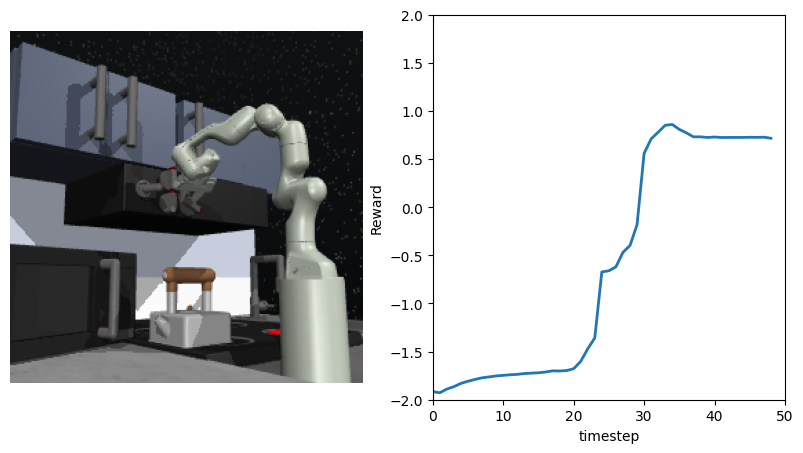

In [17]:
# show a video of the trajectory along with a plot of the icvf
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_axis_off()
ax[1].set_xlim(0, N)
ax[1].set_ylim(-2, 2)
ax[1].set_xlabel("timestep")
ax[1].set_ylabel("Reward")
im = ax[0].imshow(img_traj[0])
line, = ax[1].plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    im.set_array(img_traj[i])
    line.set_data(np.arange(i), rews[:i])
    return line,
ani = animation.FuncAnimation(fig, animate, frames=N, init_func=init, blit=True)
HTML(ani.to_jshtml())

In [18]:
datadict = {}
obses = []
next_obses = []
dones = []
actions = []
rewards = []
for traj in ds:
    N = len(traj['images']) - 1
    obs = jax.image.resize(traj['images'][:-1], (N, 128, 128, 3), 'bilinear')
    next_obs = jax.image.resize(traj['images'][1:], (N, 128, 128, 3), 'bilinear')
    action = traj['actions'][:-1]
    reward = traj['env_infos']['solved'][:-1].astype(np.float32)
    done = np.zeros_like(reward)
    done[-1] = 1.0
    obses.append(obs)
    next_obses.append(next_obs)
    actions.append(action)
    rewards.append(reward)
    dones.append(done)
datadict['observations'] = {'image': np.concatenate(obses, axis=0)}
datadict['next_observations'] = {'image': np.concatenate(next_obses, axis=0)}
datadict['actions'] = np.concatenate(actions, axis=0)
datadict['rewards'] = np.concatenate(rewards, axis=0)
datadict['dones_float'] = np.concatenate(dones, axis=0)
path = "/nfs/kun2/users/dashora7/franka_datasets"
np.save(os.path.join(path, "dibya_knob1_on.npy"), datadict, allow_pickle=True)

In [2]:
from envs import KitchenEnv
import gym
envname = "kitchen-" + 'microwave' + "-v0"
env = gym.make(envname)

/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_franka/lib/python3.9/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group


Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']
Choosing the latest nvidia driver: /usr/lib/nvidia-465, among ['/usr/lib/nvidia-375', '/usr/lib/nvidia-465']


/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_franka/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
No module named 'flow'
No module named 'carla'
/home/dashora7/franka_d4rl/d4rl/kitchen/adept_envs/franka/robot/franka_robot.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.robot_mode[i] = read_config_from_node(
/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_franka/lib/python3.9/site-packages/dm_control/mujoco/wrapper/util.py:218: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  arr = _as_array(src, shape)
/nfs/kun2/users/dashora7/miniconda/envs/rlpd11_franka/lib/python3.9/site-packag

(128, 128, 3, 1)


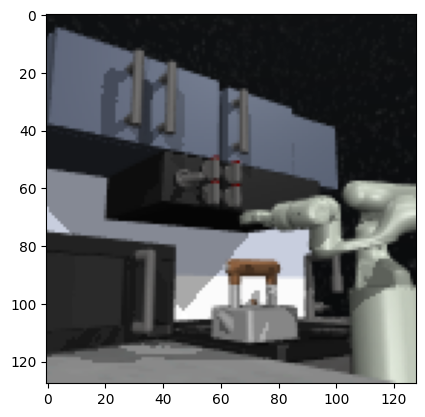

In [3]:
s = env.reset()
im = s['image']
print(im.shape)
image_to_show = im[..., 0]
plt.imshow(image_to_show)

(128, 128, 3, 1)


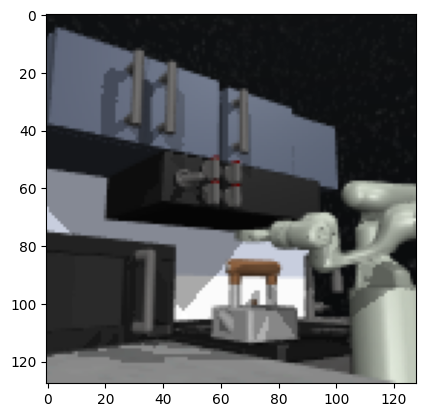

In [4]:
action = env.action_space.sample()
next_observation, reward, done, info = env.step(action)
next_im = next_observation['image']
print(next_im.shape)
next_image_to_show = next_im[..., 0]
plt.imshow(next_image_to_show)